# **Data Study and Visualisation**

## Objectives

* Answer business requirement 1:
  * The client is interested in understanding the patterns in stock performance, so they can identify the most relevant variables that are correlated with price movements and trends. This will help the client make informed decisions and better predict future stock behavior
* Evaluate and explore raw data
* Extract features for exploratory analysis
* Define the target variable for supervised learning

## Inputs

* outputs/datasets/collection/phnx_2015_2025.csv

## Outputs

* Initial visualizations of key patterns and relationships
* generate code that answers business requirement 1 and can be used to build the Streamlit App

## Additional Comments

* Some feature engineering tasks were performed at this stage to support pattern discovery and visualization, even though full feature analysis will take place later. This helps guide modeling decisions and improves understanding of the dataset's structure


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os

current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

---

## Load Data

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/phnx_2015_2025.csv")
print(df.shape)
df.head(3)

(2526, 8)


date        open        high         low       close  \
0  2015-01-02 00:00:00+00:00  628.713742  630.618931  620.894841  624.522278   
1  2015-01-05 00:00:00+00:00  624.141181  627.951559  610.835330  611.947998   
2  2015-01-06 00:00:00+00:00  615.758388  615.758388  597.087463  597.087463   

   volume  dividends  stock splits  
0  385199        0.0           0.0  
1  416491        0.0           0.0  
2  781658        0.0           0.0

---

## Data Exploration

In [5]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

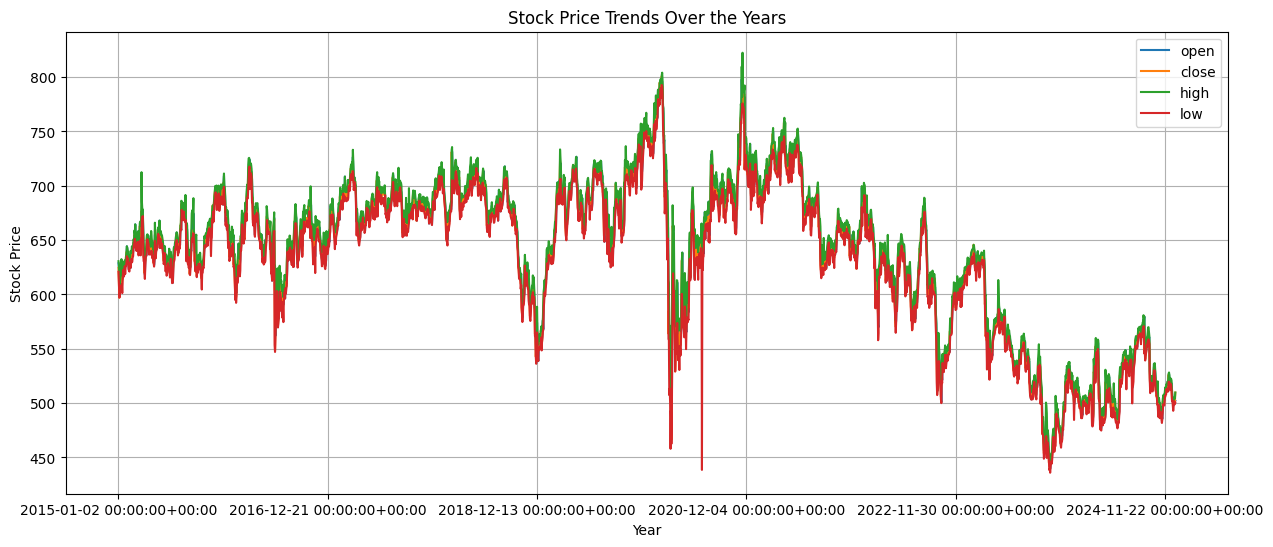

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


df.plot.line(y=['open', 'close', 'high', 'low'], x='date', figsize=(15, 6))
plt.title('Stock Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [7]:
df.describe()

open         high          low        close        volume  \
count  2526.000000  2526.000000  2526.000000  2526.000000  2.526000e+03   
mean    637.464158   643.787474   630.800528   637.090194  1.821048e+06   
std      69.761266    69.767000    69.649119    69.744807  1.728536e+06   
min     439.574104   445.867994   435.977583   441.172577  0.000000e+00   
25%     600.914282   609.637347   592.267087   599.349609  8.510395e+05   
50%     653.088221   658.839240   646.666051   652.719177  1.366236e+06   
75%     687.146716   693.398339   681.386011   687.870102  2.188927e+06   
max     798.137775   822.481073   792.750327   801.130798  3.707343e+07   

         dividends  stock splits  
count  2526.000000        2526.0  
mean      0.074142           0.0  
std       1.323629           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max      26.650000           0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2526 non-null   object 
 1   open          2526 non-null   float64
 2   high          2526 non-null   float64
 3   low           2526 non-null   float64
 4   close         2526 non-null   float64
 5   volume        2526 non-null   int64  
 6   dividends     2526 non-null   float64
 7   stock splits  2526 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 158.0+ KB


Review the average across all continuous numerical features

In [9]:
mean = df[['open','close','high','low','volume']].mean()
print(f"Open: {mean['open']:.2f}")
print(f"Close: {mean['close']:.2f}")
print(f"High: {mean['high']:.2f}")
print(f"Low: {mean['low']:.2f}")
print(f"Volume: {mean['volume']:.2f}")

Open: 637.46
Close: 637.09
High: 643.79
Low: 630.80
Volume: 1821047.57


Review the mode across all continuous numerical features, identifying a mode for this type of data can be difficult due to the high variability and lack of repetition in the values

In [10]:
mode = df[['open','close','high','low','volume']].mode()
print(mode)

            open       close        high         low    volume
0     513.754860  698.370605  516.753452  651.194950         0
1     517.752991         NaN  629.670746  696.647097     74846
2     639.108844         NaN  636.165083         NaN     75348
3     640.904669         NaN  641.287913         NaN     75989
4     647.966225         NaN  643.392231         NaN    115965
...          ...         ...         ...         ...       ...
2521         NaN         NaN         NaN         NaN  13479477
2522         NaN         NaN         NaN         NaN  13876739
2523         NaN         NaN         NaN         NaN  14261660
2524         NaN         NaN         NaN         NaN  16138457
2525         NaN         NaN         NaN         NaN  37073433

[2526 rows x 5 columns]


Review the median across all continuous numerical features

In [11]:
median = df[['open','close','high','low','volume']].median()
print(f"Open: {median['open']:.2f}")
print(f"Close: {median['close']:.2f}")
print(f"High: {median['high']:.2f}")
print(f"Low: {median['low']:.2f}")
print(f"Volume: {median['volume']:.2f}")

Open: 653.09
Close: 652.72
High: 658.84
Low: 646.67
Volume: 1366236.00


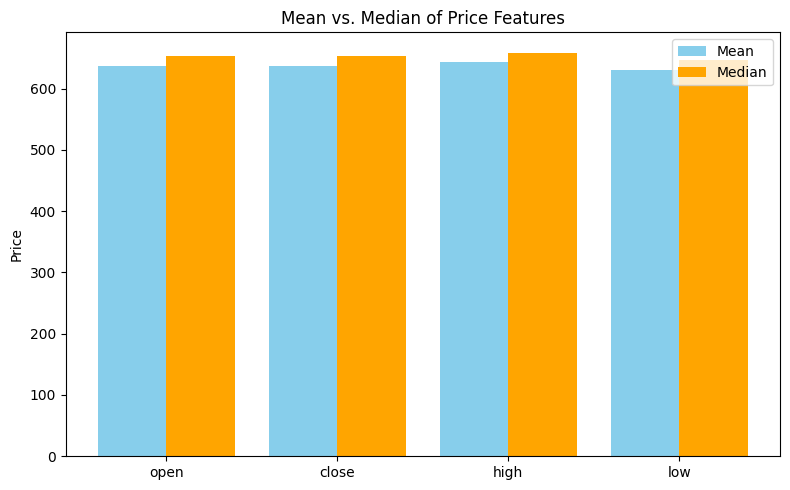

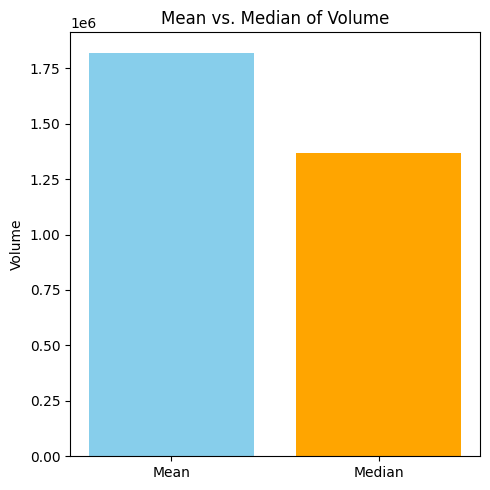

In [12]:
price_cols = ['open', 'close', 'high', 'low']
means_price = [df[col].mean() for col in price_cols]
medians_price = [df[col].median() for col in price_cols]

plt.figure(figsize=(8, 5))
x = range(len(price_cols))
plt.bar(x, means_price, width=0.4, label='Mean', color='skyblue')
plt.bar([i + 0.4 for i in x], medians_price, width=0.4, label='Median', color='orange')
plt.xticks([i + 0.2 for i in x], price_cols)
plt.ylabel('Price')
plt.title('Mean vs. Median of Price Features')
plt.legend()
plt.tight_layout()
plt.show()


volume_mean = df['volume'].mean()
volume_median = df['volume'].median()

plt.figure(figsize=(5, 5))
plt.bar(['Mean', 'Median'], [volume_mean, volume_median], color=['skyblue', 'orange'])
plt.title('Mean vs. Median of Volume')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


---

## Feature Extraction

Drop 'dividends' and 'stock splits' since they hold no meaningfull value

In [13]:
df = df.drop(['dividends','stock splits'],axis=1)
print(df.shape)
df.head(3)

(2526, 6)


date        open        high         low       close  \
0  2015-01-02 00:00:00+00:00  628.713742  630.618931  620.894841  624.522278   
1  2015-01-05 00:00:00+00:00  624.141181  627.951559  610.835330  611.947998   
2  2015-01-06 00:00:00+00:00  615.758388  615.758388  597.087463  597.087463   

   volume  
0  385199  
1  416491  
2  781658

Convert datetime object to a date format

In [14]:
df['date'] = pd.to_datetime(df['date'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    2526 non-null   datetime64[ns, UTC]
 1   open    2526 non-null   float64            
 2   high    2526 non-null   float64            
 3   low     2526 non-null   float64            
 4   close   2526 non-null   float64            
 5   volume  2526 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 118.5 KB


Extract the days of the week and the year from the 'date' column, store them in new columns, and then drop the 'date' column

In [15]:
df.insert(1, 'year', df['date'].dt.year)
df.insert(2, 'weekday', df['date'].dt.day_name())
df = df.drop(['date'],axis=1)
print(df.shape)
df.head(3)

(2526, 7)


year  weekday        open        high         low       close  volume
0  2015   Friday  628.713742  630.618931  620.894841  624.522278  385199
1  2015   Monday  624.141181  627.951559  610.835330  611.947998  416491
2  2015  Tuesday  615.758388  615.758388  597.087463  597.087463  781658

One hot encode the 'weekday' column

In [16]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df = encoder.fit_transform(df)
print(df.shape)
df.head(3)

(2526, 12)


year        open        high         low       close  volume  \
0  2015  628.713742  630.618931  620.894841  624.522278  385199   
1  2015  624.141181  627.951559  610.835330  611.947998  416491   
2  2015  615.758388  615.758388  597.087463  597.087463  781658   

   weekday_Friday  weekday_Monday  weekday_Tuesday  weekday_Wednesday  \
0               1               0                0                  0   
1               0               1                0                  0   
2               0               0                1                  0   

   weekday_Thursday  weekday_Sunday  
0                 0               0  
1                 0               0  
2                 0               0

In [17]:
df.columns = df.columns.str.lower()
df.head(3)

year        open        high         low       close  volume  \
0  2015  628.713742  630.618931  620.894841  624.522278  385199   
1  2015  624.141181  627.951559  610.835330  611.947998  416491   
2  2015  615.758388  615.758388  597.087463  597.087463  781658   

   weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  \
0               1               0                0                  0   
1               0               1                0                  0   
2               0               0                1                  0   

   weekday_thursday  weekday_sunday  
0                 0               0  
1                 0               0  
2                 0               0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2526 non-null   int32  
 1   open               2526 non-null   float64
 2   high               2526 non-null   float64
 3   low                2526 non-null   float64
 4   close              2526 non-null   float64
 5   volume             2526 non-null   int64  
 6   weekday_friday     2526 non-null   int32  
 7   weekday_monday     2526 non-null   int32  
 8   weekday_tuesday    2526 non-null   int32  
 9   weekday_wednesday  2526 non-null   int32  
 10  weekday_thursday   2526 non-null   int32  
 11  weekday_sunday     2526 non-null   int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 167.9 KB


Create lag features by shifting previous rows to capture historical trends and support time-based pattern analysis

In [19]:
df['pre_open'] = df['open'].shift(+1)
df['pre_open_2'] = df['open'].shift(+2)

df['pre_high'] = df['high'].shift(+1)
df['pre_high_2'] = df['high'].shift(+2)

df['pre_low'] = df['low'].shift(+1)
df['pre_low_2'] = df['low'].shift(+2)

df['pre_close'] = df['close'].shift(+1)
df['pre_close_2'] = df['close'].shift(+2)

df['pre_vol'] = df['volume'].shift(+1)
df['pre_vol_2'] = df['volume'].shift(+2)

df['pre_average'] = df[['open', 'close']].mean(axis=1).shift(+1)
df['pre_average_2'] = df[['open', 'close']].mean(axis=1).shift(+2)

print(df.shape)
df

(2526, 24)


year        open        high         low       close   volume  \
0     2015  628.713742  630.618931  620.894841  624.522278   385199   
1     2015  624.141181  627.951559  610.835330  611.947998   416491   
2     2015  615.758388  615.758388  597.087463  597.087463   781658   
3     2015  603.184177  605.447524  597.925840  603.946289   743617   
4     2015  607.375613  611.948103  605.089338  611.567078   453541   
...    ...         ...         ...         ...         ...      ...   
2521  2024  498.162306  502.260357  496.762980  501.260834  1071229   
2522  2024  502.260351  505.258920  501.760590  501.760590   436491   
2523  2024  500.261324  503.759655  500.261324  502.760132   881757   
2524  2024  501.760601  504.759170  498.961948  500.761078   608408   
2525  2024  502.260352  509.756775  500.523174  509.756775   514204   

      weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  ...  \
0                  1               0                0                  0  ...   
1                  0               1                0                  0  ...   
2                  0               0                1                  0  ...   
3                  0               0                0                  1  ...   
4                  0               0                0                  0  ...   
...              ...             ...              ...                ...  ...   
2521               0               1                0                  0  ...   
2522               0               0                1                  0  ...   
2523               1               0                0                  0  ...   
2524               0               1                0                  0  ...   
2525               0               0                1                  0  ...   

        pre_high  pre_high_2     pre_low   pre_low_2   pre_close  pre_close_2  \
0            NaN         NaN         NaN         NaN         NaN          NaN   
1     630.618931         NaN  620.894841         NaN  624.522278          NaN   
2     627.951559  630.618931  610.835330  620.894841  611.947998   624.522278   
3     615.758388  627.951559  597.087463  610.835330  597.087463   611.947998   
4     605.447524  615.758388  597.925840  597.087463  603.946289   597.087463   
...          ...         ...         ...         ...         ...          ...   
2521  502.260368  501.760601  492.964815  497.162789  500.261322   500.761078   
2522  502.260357  502.260368  496.762980  492.964815  501.260834   500.261322   
2523  505.258920  502.260357  501.760590  496.762980  501.760590   501.260834   
2524  503.759655  505.258920  500.261324  501.760590  502.760132   501.760590   
2525  504.759170  503.759655  498.961948  500.261324  500.761078   502.760132   

        pre_vol  pre_vol_2  pre_average  pre_average_2  
0           NaN        NaN          NaN            NaN  
1      385199.0        NaN   626.618010            NaN  
2      416491.0   385199.0   618.044590     626.618010  
3      781658.0   416491.0   606.422926     618.044590  
4      743617.0   781658.0   603.565233     606.422926  
...         ...        ...          ...            ...  
2521  3415182.0  1667456.0   500.011441     501.010959  
2522  1071229.0  3415182.0   499.711570     500.011441  
2523   436491.0  1071229.0   502.010470     499.711570  
2524   881757.0   436491.0   501.510728     502.010470  
2525   608408.0   881757.0   501.260839     501.510728  

[2526 rows x 24 columns]

---

## Target Variable Definition for Classification and Regression

Create a regression target by calculating tomorrow’s average price (mean of open and close). This target was chosen arbitrarily

In [20]:
df['average'] = df[['open', 'close']].mean(axis=1)

In [21]:
highest = df['average'].max()
lowest = df['average'].min()

print(f"Highest average price: {highest}")
print(f"Lowest average price: {lowest}")

Highest average price: 798.6864892048982
Lowest average price: 441.97177496675596


In [22]:
df['tomorrows_average'] = df[['open', 'close']].mean(axis=1).shift(-1)
print(df.shape)
df

(2526, 26)


year        open        high         low       close   volume  \
0     2015  628.713742  630.618931  620.894841  624.522278   385199   
1     2015  624.141181  627.951559  610.835330  611.947998   416491   
2     2015  615.758388  615.758388  597.087463  597.087463   781658   
3     2015  603.184177  605.447524  597.925840  603.946289   743617   
4     2015  607.375613  611.948103  605.089338  611.567078   453541   
...    ...         ...         ...         ...         ...      ...   
2521  2024  498.162306  502.260357  496.762980  501.260834  1071229   
2522  2024  502.260351  505.258920  501.760590  501.760590   436491   
2523  2024  500.261324  503.759655  500.261324  502.760132   881757   
2524  2024  501.760601  504.759170  498.961948  500.761078   608408   
2525  2024  502.260352  509.756775  500.523174  509.756775   514204   

      weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  ...  \
0                  1               0                0                  0  ...   
1                  0               1                0                  0  ...   
2                  0               0                1                  0  ...   
3                  0               0                0                  1  ...   
4                  0               0                0                  0  ...   
...              ...             ...              ...                ...  ...   
2521               0               1                0                  0  ...   
2522               0               0                1                  0  ...   
2523               1               0                0                  0  ...   
2524               0               1                0                  0  ...   
2525               0               0                1                  0  ...   

         pre_low   pre_low_2   pre_close  pre_close_2    pre_vol  pre_vol_2  \
0            NaN         NaN         NaN          NaN        NaN        NaN   
1     620.894841         NaN  624.522278          NaN   385199.0        NaN   
2     610.835330  620.894841  611.947998   624.522278   416491.0   385199.0   
3     597.087463  610.835330  597.087463   611.947998   781658.0   416491.0   
4     597.925840  597.087463  603.946289   597.087463   743617.0   781658.0   
...          ...         ...         ...          ...        ...        ...   
2521  492.964815  497.162789  500.261322   500.761078  3415182.0  1667456.0   
2522  496.762980  492.964815  501.260834   500.261322  1071229.0  3415182.0   
2523  501.760590  496.762980  501.760590   501.260834   436491.0  1071229.0   
2524  500.261324  501.760590  502.760132   501.760590   881757.0   436491.0   
2525  498.961948  500.261324  500.761078   502.760132   608408.0   881757.0   

      pre_average  pre_average_2     average  tomorrows_average  
0             NaN            NaN  626.618010         618.044590  
1      626.618010            NaN  618.044590         606.422926  
2      618.044590     626.618010  606.422926         603.565233  
3      606.422926     618.044590  603.565233         609.471345  
4      603.565233     606.422926  609.471345         611.376429  
...           ...            ...         ...                ...  
2521   500.011441     501.010959  499.711570         502.010470  
2522   499.711570     500.011441  502.010470         501.510728  
2523   502.010470     499.711570  501.510728         501.260839  
2524   501.510728     502.010470  501.260839         506.008563  
2525   501.260839     501.510728  506.008563                NaN  

[2526 rows x 26 columns]

Classification target: Created by comparing tomorrow’s average price (mean of open and close) to today’s, labeling as 1 if higher and 0 if lower, chosen arbitrarily to explore directional prediction

In [23]:
df['target'] = (df['tomorrows_average'] > df['average']).astype(int)
print(df.shape)
df

(2526, 27)


year        open        high         low       close   volume  \
0     2015  628.713742  630.618931  620.894841  624.522278   385199   
1     2015  624.141181  627.951559  610.835330  611.947998   416491   
2     2015  615.758388  615.758388  597.087463  597.087463   781658   
3     2015  603.184177  605.447524  597.925840  603.946289   743617   
4     2015  607.375613  611.948103  605.089338  611.567078   453541   
...    ...         ...         ...         ...         ...      ...   
2521  2024  498.162306  502.260357  496.762980  501.260834  1071229   
2522  2024  502.260351  505.258920  501.760590  501.760590   436491   
2523  2024  500.261324  503.759655  500.261324  502.760132   881757   
2524  2024  501.760601  504.759170  498.961948  500.761078   608408   
2525  2024  502.260352  509.756775  500.523174  509.756775   514204   

      weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  ...  \
0                  1               0                0                  0  ...   
1                  0               1                0                  0  ...   
2                  0               0                1                  0  ...   
3                  0               0                0                  1  ...   
4                  0               0                0                  0  ...   
...              ...             ...              ...                ...  ...   
2521               0               1                0                  0  ...   
2522               0               0                1                  0  ...   
2523               1               0                0                  0  ...   
2524               0               1                0                  0  ...   
2525               0               0                1                  0  ...   

       pre_low_2   pre_close  pre_close_2    pre_vol  pre_vol_2  pre_average  \
0            NaN         NaN          NaN        NaN        NaN          NaN   
1            NaN  624.522278          NaN   385199.0        NaN   626.618010   
2     620.894841  611.947998   624.522278   416491.0   385199.0   618.044590   
3     610.835330  597.087463   611.947998   781658.0   416491.0   606.422926   
4     597.087463  603.946289   597.087463   743617.0   781658.0   603.565233   
...          ...         ...          ...        ...        ...          ...   
2521  497.162789  500.261322   500.761078  3415182.0  1667456.0   500.011441   
2522  492.964815  501.260834   500.261322  1071229.0  3415182.0   499.711570   
2523  496.762980  501.760590   501.260834   436491.0  1071229.0   502.010470   
2524  501.760590  502.760132   501.760590   881757.0   436491.0   501.510728   
2525  500.261324  500.761078   502.760132   608408.0   881757.0   501.260839   

      pre_average_2     average  tomorrows_average  target  
0               NaN  626.618010         618.044590       0  
1               NaN  618.044590         606.422926       0  
2        626.618010  606.422926         603.565233       0  
3        618.044590  603.565233         609.471345       1  
4        606.422926  609.471345         611.376429       1  
...             ...         ...                ...     ...  
2521     501.010959  499.711570         502.010470       1  
2522     500.011441  502.010470         501.510728       0  
2523     499.711570  501.510728         501.260839       0  
2524     502.010470  501.260839         506.008563       1  
2525     501.510728  506.008563                NaN       0  

[2526 rows x 27 columns]

---

## Assessing Missing Data Levels

In [24]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['pre_open',
 'pre_open_2',
 'pre_high',
 'pre_high_2',
 'pre_low',
 'pre_low_2',
 'pre_close',
 'pre_close_2',
 'pre_vol',
 'pre_vol_2',
 'pre_average',
 'pre_average_2',
 'tomorrows_average']

In [25]:
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [27]:
EvaluateMissingData(df)

RowsWithMissingData  PercentageOfDataset DataType
pre_open_2                           2                 0.08  float64
pre_average_2                        2                 0.08  float64
pre_vol_2                            2                 0.08  float64
pre_close_2                          2                 0.08  float64
pre_low_2                            2                 0.08  float64
pre_high_2                           2                 0.08  float64
pre_high                             1                 0.04  float64
tomorrows_average                    1                 0.04  float64
pre_average                          1                 0.04  float64
pre_vol                              1                 0.04  float64
pre_close                            1                 0.04  float64
pre_low                              1                 0.04  float64
pre_open                             1                 0.04  float64

---

## Imputation

At this stage, a imputation method could be used to replace missing data, such as mean imputation. However, since the amount of missing data is very small, we will simply drop the missing data

In [28]:
df = df.dropna()
print(df.shape)
df

(2523, 27)


year        open        high         low       close   volume  \
2     2015  615.758388  615.758388  597.087463  597.087463   781658   
3     2015  603.184177  605.447524  597.925840  603.946289   743617   
4     2015  607.375613  611.948103  605.089338  611.567078   453541   
5     2015  610.804860  616.139340  607.756534  611.947998   404476   
6     2015  615.758369  617.282533  607.375563  610.423889   361651   
...    ...         ...         ...         ...         ...      ...   
2520  2024  499.761560  502.260368  492.964815  500.261322  3415182   
2521  2024  498.162306  502.260357  496.762980  501.260834  1071229   
2522  2024  502.260351  505.258920  501.760590  501.760590   436491   
2523  2024  500.261324  503.759655  500.261324  502.760132   881757   
2524  2024  501.760601  504.759170  498.961948  500.761078   608408   

      weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  ...  \
2                  0               0                1                  0  ...   
3                  0               0                0                  1  ...   
4                  0               0                0                  0  ...   
5                  1               0                0                  0  ...   
6                  0               1                0                  0  ...   
...              ...             ...              ...                ...  ...   
2520               1               0                0                  0  ...   
2521               0               1                0                  0  ...   
2522               0               0                1                  0  ...   
2523               1               0                0                  0  ...   
2524               0               1                0                  0  ...   

       pre_low_2   pre_close  pre_close_2    pre_vol  pre_vol_2  pre_average  \
2     620.894841  611.947998   624.522278   416491.0   385199.0   618.044590   
3     610.835330  597.087463   611.947998   781658.0   416491.0   606.422926   
4     597.087463  603.946289   597.087463   743617.0   781658.0   603.565233   
5     597.925840  611.567078   603.946289   453541.0   743617.0   609.471345   
6     605.089338  611.947998   611.567078   404476.0   453541.0   611.376429   
...          ...         ...          ...        ...        ...          ...   
2520  502.760109  500.761078   504.759155  1667456.0  1369942.0   501.010959   
2521  497.162789  500.261322   500.761078  3415182.0  1667456.0   500.011441   
2522  492.964815  501.260834   500.261322  1071229.0  3415182.0   499.711570   
2523  496.762980  501.760590   501.260834   436491.0  1071229.0   502.010470   
2524  501.760590  502.760132   501.760590   881757.0   436491.0   501.510728   

      pre_average_2     average  tomorrows_average  target  
2        626.618010  606.422926         603.565233       0  
3        618.044590  603.565233         609.471345       1  
4        606.422926  609.471345         611.376429       1  
5        603.565233  611.376429         613.091129       1  
6        609.471345  613.091129         621.664511       1  
...             ...         ...                ...     ...  
2520     504.759155  500.011441         499.711570       0  
2521     501.010959  499.711570         502.010470       1  
2522     500.011441  502.010470         501.510728       0  
2523     499.711570  501.510728         501.260839       0  
2524     502.010470  501.260839         506.008563       1  

[2523 rows x 27 columns]

In [29]:
EvaluateMissingData(df)

Empty DataFrame
Columns: [RowsWithMissingData, PercentageOfDataset, DataType]
Index: []

---

## Target Imbalance

Target imbalance is typically a categorical issue, but for regression, we will also check tomorrow's average to assess the distribution of the target variable

* Categorical

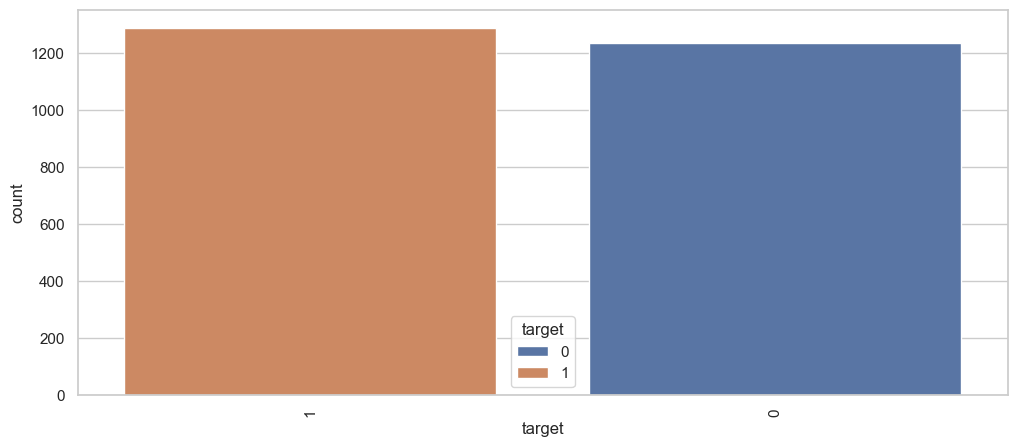

In [30]:
import seaborn as sns
sns.set_theme(style='whitegrid')


plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='target', hue='target', order=df['target'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

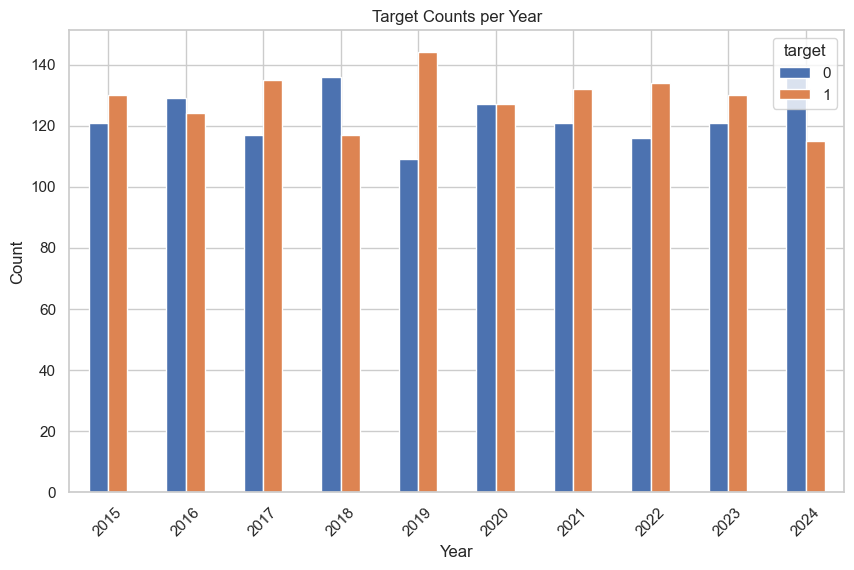

In [31]:
count = df.groupby(['year', 'target']).size().unstack(fill_value=0)
count.plot(kind='bar', figsize=(10, 6))
plt.title('Target Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Regression

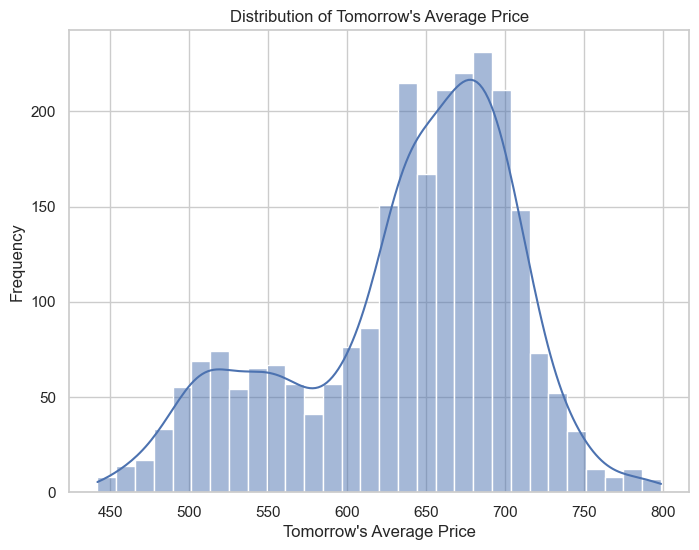

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tomorrows_average'], bins=30, kde=True)
plt.title('Distribution of Tomorrow\'s Average Price')
plt.xlabel('Tomorrow\'s Average Price')
plt.ylabel('Frequency')
plt.show()

Due to the targets being relatively balanced, techniques to address class imbalance were not necessary. However, had there been an imbalance, SMOTE (Synthetic Minority Over-sampling Technique) can be used, as it is well-suited for smaller datasets

---

## Correlation and PPS Analysis

In [33]:
df = df.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2523 entries, 2 to 2524
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2523 non-null   int32  
 1   open               2523 non-null   float64
 2   high               2523 non-null   float64
 3   low                2523 non-null   float64
 4   close              2523 non-null   float64
 5   volume             2523 non-null   int64  
 6   weekday_friday     2523 non-null   int32  
 7   weekday_monday     2523 non-null   int32  
 8   weekday_tuesday    2523 non-null   int32  
 9   weekday_wednesday  2523 non-null   int32  
 10  weekday_thursday   2523 non-null   int32  
 11  weekday_sunday     2523 non-null   int32  
 12  pre_open           2523 non-null   float64
 13  pre_open_2         2523 non-null   float64
 14  pre_high           2523 non-null   float64
 15  pre_high_2         2523 non-null   float64
 16  pre_low            2523 non-n

In [35]:
df.head(3)

year        open        high         low       close  volume  \
2  2015  615.758388  615.758388  597.087463  597.087463  781658   
3  2015  603.184177  605.447524  597.925840  603.946289  743617   
4  2015  607.375613  611.948103  605.089338  611.567078  453541   

   weekday_friday  weekday_monday  weekday_tuesday  weekday_wednesday  ...  \
2               0               0                1                  0  ...   
3               0               0                0                  1  ...   
4               0               0                0                  0  ...   

    pre_low_2   pre_close  pre_close_2   pre_vol  pre_vol_2  pre_average  \
2  620.894841  611.947998   624.522278  416491.0   385199.0   618.044590   
3  610.835330  597.087463   611.947998  781658.0   416491.0   606.422926   
4  597.087463  603.946289   597.087463  743617.0   781658.0   603.565233   

   pre_average_2     average  tomorrows_average  target  
2     626.618010  606.422926         603.565233       0  
3     618.044590  603.565233         609.471345       1  
4     606.422926  609.471345         611.376429       1  

[3 rows x 27 columns]

In [36]:
import numpy as np
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5, linecolor='grey')
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

The PPS threshold score indicates that over 75% of the features have a high PPS score above 0.76, demonstrating a strong correlation between those features

In [37]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count  mean    std  min  25%  50%    75%    max
ppscore  702.0   0.3  0.387  0.0  0.0  0.0  0.778  0.923




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



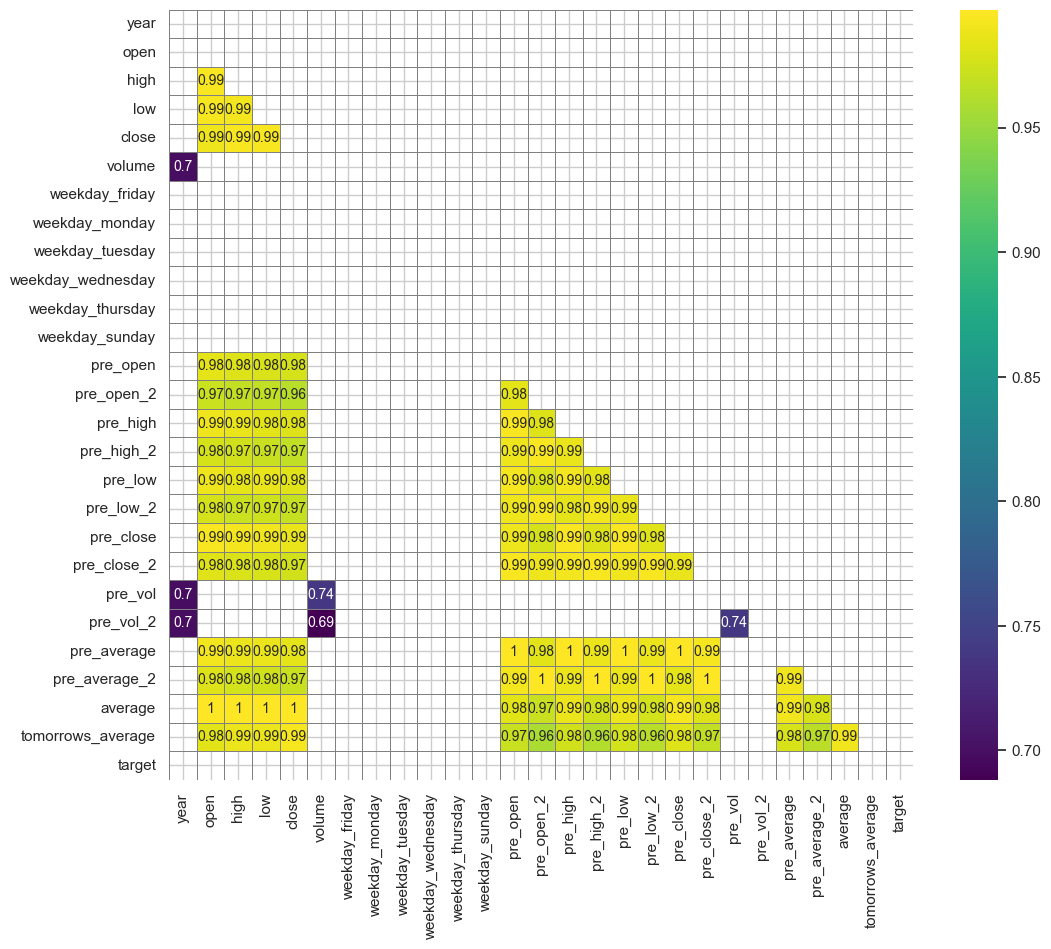



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



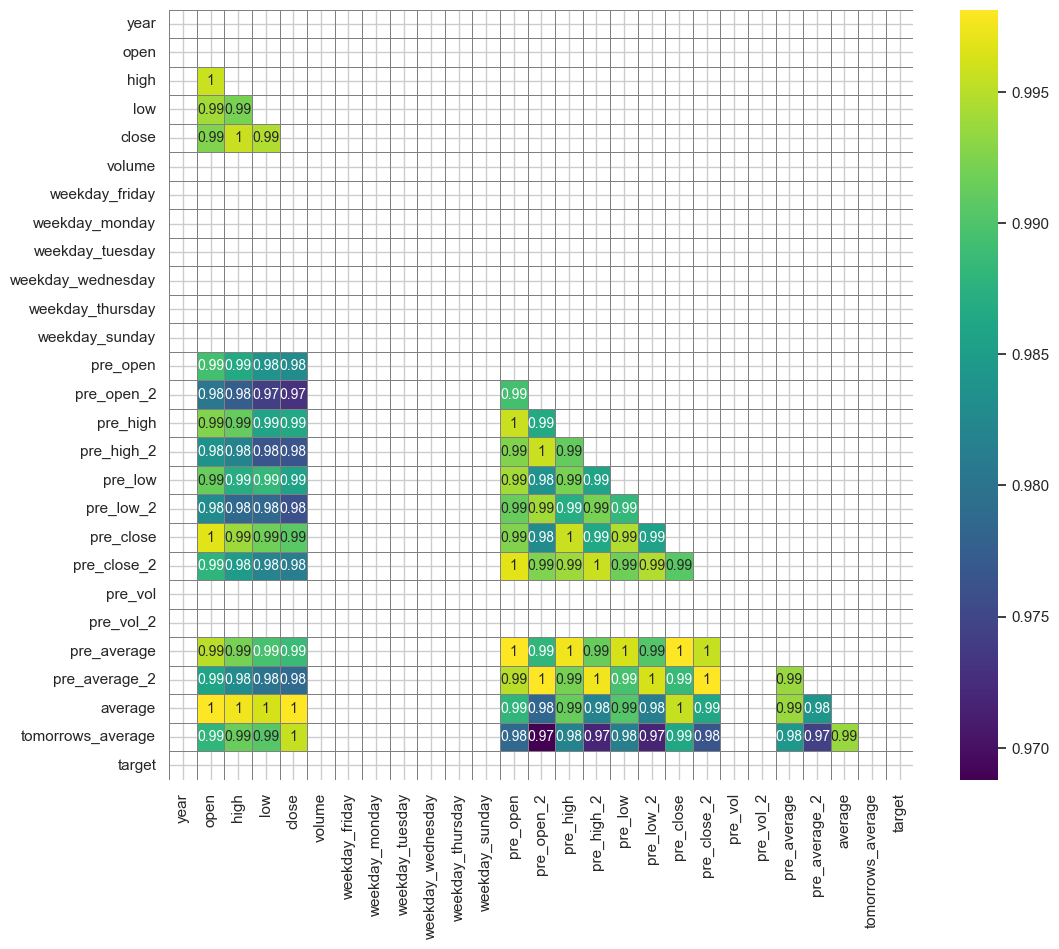



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



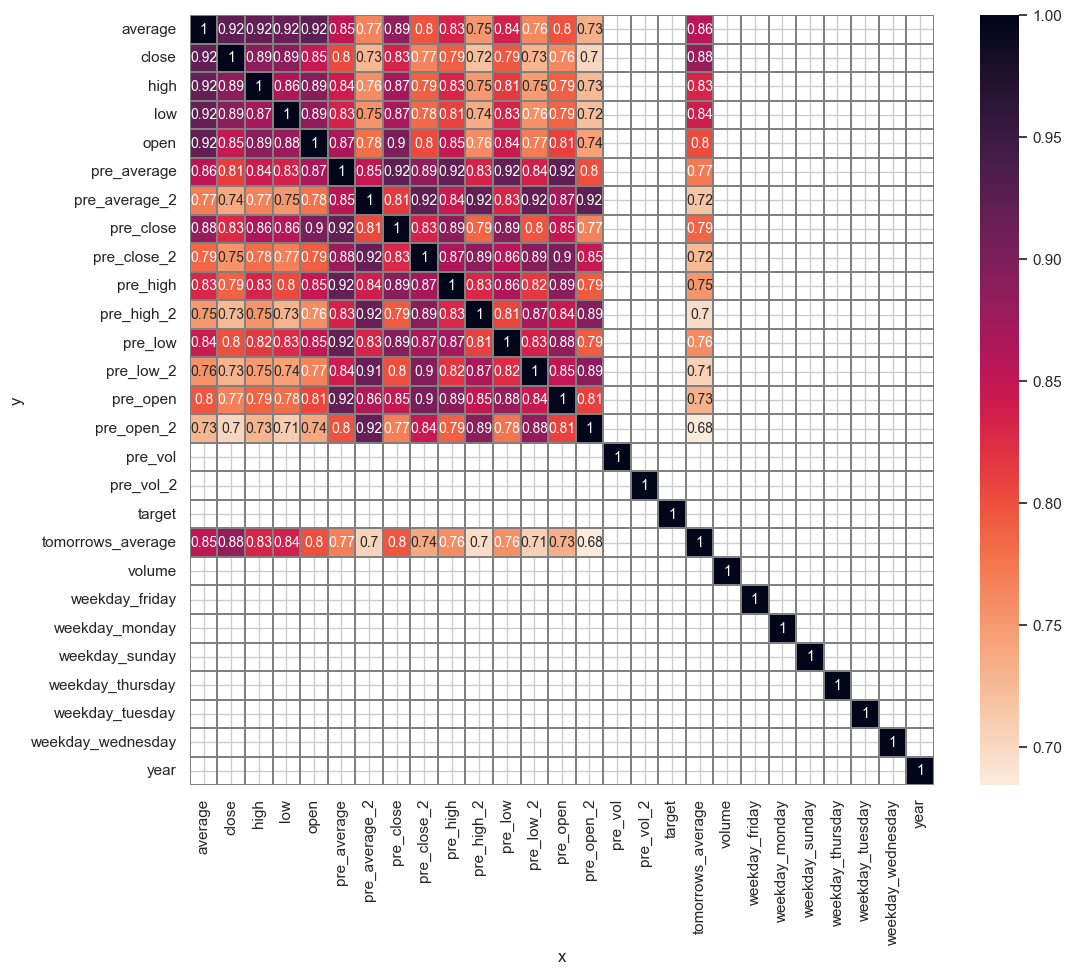

In [38]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.6, PPS_Threshold =0.6,
                  figsize=(12,10), font_annot=10)

Although we are achieving some high correlations between certain values, which can be expected with stock chart data, there is no significant correlation with the target or the date features

---

## Correlation-Based Feature Importance

Next, we use both Spearman and Pearson correlation methods to assess the strength of the relationship between each feature and the target variable. By taking the absolute values of the correlations, we can identify and rank features that may be most relevant to the target, regardless of the direction of the relationship

* Spearman (monotonic)

In [39]:
target_var = 'target'

corr_spearman = df.corr(method='spearman')[target_var].sort_values(key=abs, ascending=False)[1:]
corr_spearman

tomorrows_average    0.073990
weekday_monday      -0.064897
open                -0.044654
pre_high_2          -0.038110
pre_high            -0.036779
pre_close_2         -0.036586
pre_average_2       -0.036262
pre_open_2          -0.035908
pre_close           -0.035220
pre_low_2           -0.034750
pre_average         -0.034743
pre_open            -0.034226
pre_low             -0.033339
weekday_wednesday    0.032593
pre_vol             -0.028259
weekday_tuesday      0.022838
pre_vol_2           -0.018165
average             -0.015171
close                0.015115
high                -0.013076
low                 -0.012759
volume              -0.012321
weekday_thursday     0.010183
year                -0.009279
weekday_sunday      -0.007213
weekday_friday       0.006630
Name: target, dtype: float64

* Pearson (linear)

In [40]:
corr_pearson = df.corr(method='pearson')[target_var].sort_values(key=abs, ascending=False)[1:]
corr_pearson

tomorrows_average    0.070259
weekday_monday      -0.064897
open                -0.034370
weekday_wednesday    0.032593
pre_close_2         -0.028199
pre_high            -0.028083
pre_high_2          -0.027572
pre_close           -0.027339
pre_average         -0.027069
pre_open            -0.026697
pre_average_2       -0.026660
pre_low_2           -0.026524
pre_low             -0.025214
pre_open_2          -0.025021
weekday_tuesday      0.022838
volume              -0.022795
close                0.018821
weekday_thursday     0.010183
year                -0.009316
average             -0.007791
high                -0.007675
weekday_sunday      -0.007213
weekday_friday       0.006630
low                 -0.006590
pre_vol_2            0.002733
pre_vol             -0.000171
Name: target, dtype: float64

Both Spearman and Pearson correlation analyses indicate low levels of correlation between the features and the target variable, with most relationships being weak and predominantly negative

---

## EDA on Selected Variables

In [41]:
top_n = 5
top_vars  = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())
top_vars

{'open',
 'pre_close_2',
 'pre_high',
 'pre_high_2',
 'tomorrows_average',
 'weekday_monday',
 'weekday_wednesday'}

In [42]:
vars_to_study = list(top_vars)
vars_to_study

['pre_high',
 'tomorrows_average',
 'weekday_monday',
 'open',
 'pre_close_2',
 'weekday_wednesday',
 'pre_high_2']

In [43]:
df_eda = df.filter(vars_to_study + [target_var])
df_eda.head(3)

pre_high  tomorrows_average  weekday_monday        open  pre_close_2  \
2  627.951559         603.565233               0  615.758388   624.522278   
3  615.758388         609.471345               0  603.184177   611.947998   
4  605.447524         611.376429               0  607.375613   597.087463   

   weekday_wednesday  pre_high_2  target  
2                  0  630.618931       0  
3                  1  627.951559       1  
4                  0  615.758388       1

---

## Variables Distribution by Target

We plot the distribution (numerical and categorical) coloured by Traget

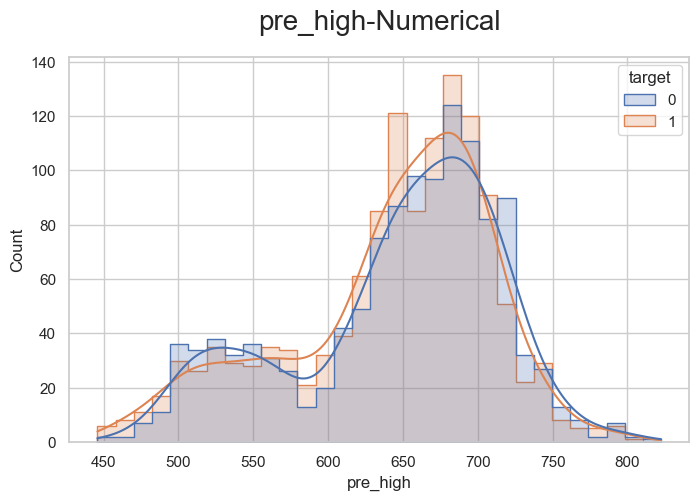

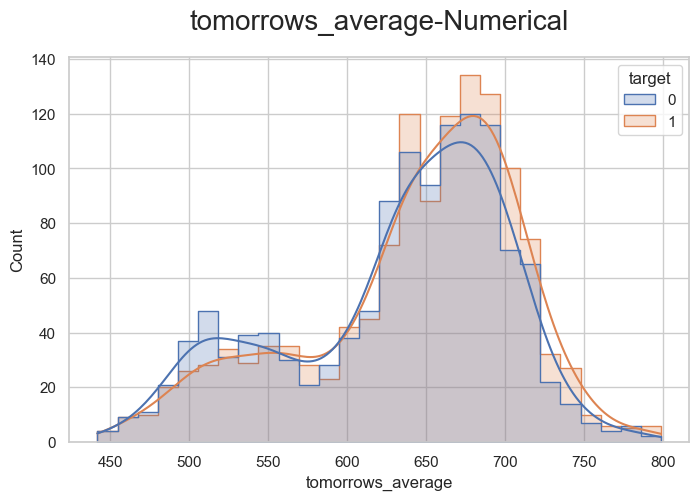

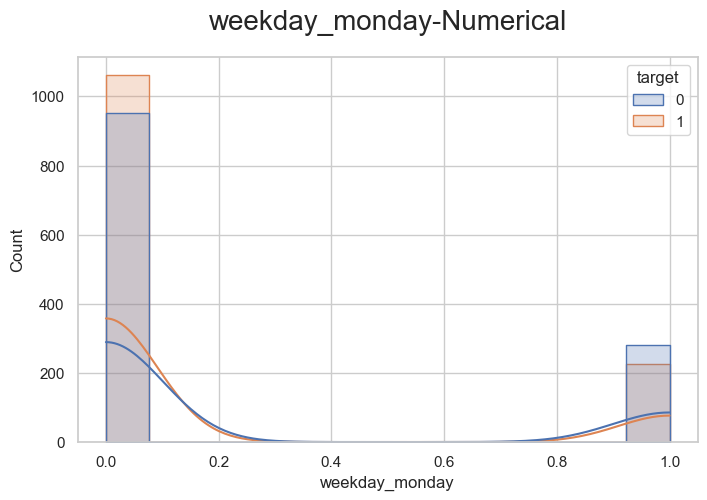

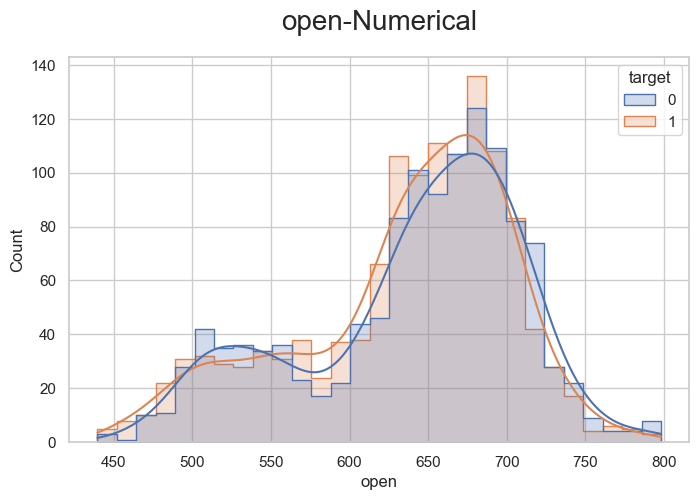

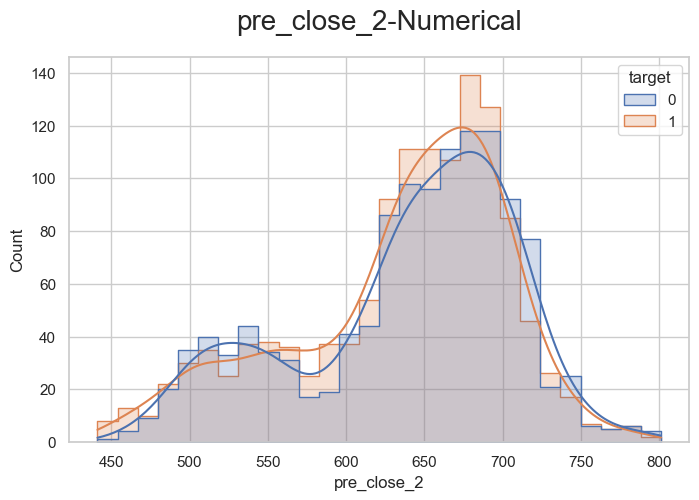

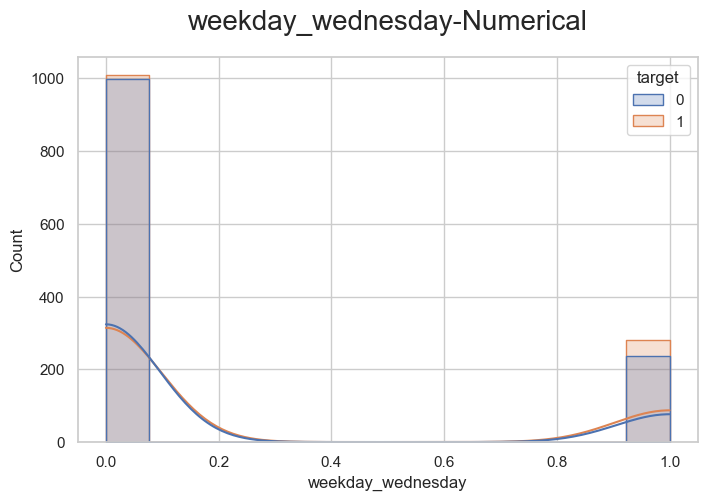

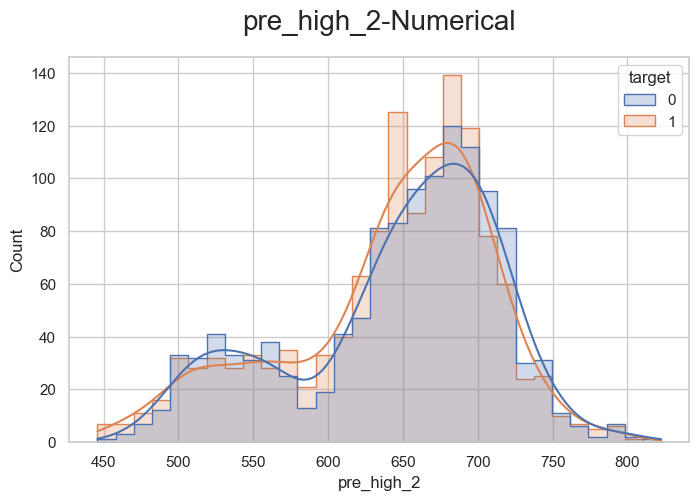

In [44]:
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}-Categorical", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}-Numerical", fontsize=20, y=1.05)
    plt.show()


for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

---

## Parallel Plot

Create a separate DataFrame and transform tomorrowa average (numerical) into bins (categorical) for visualising at parallel_categories() plot

In [45]:
median = df['tomorrows_average'].median()
print(median)

652.9764348547028


In [46]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
bin_map = [-np.inf, 600, 650, 700, np.inf]
disc = ArbitraryDiscretiser(binning_dict={'tomorrows_average': bin_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

pre_high  tomorrows_average  weekday_monday        open  pre_close_2  \
2  627.951559                  1               0  615.758388   624.522278   
3  615.758388                  1               0  603.184177   611.947998   
4  605.447524                  1               0  607.375613   597.087463   
5  611.948103                  1               0  610.804860   603.946289   
6  616.139340                  1               1  615.758369   611.567078   

   weekday_wednesday  pre_high_2  target  
2                  0  630.618931       0  
3                  1  627.951559       1  
4                  0  615.758388       1  
5                  0  605.447524       1  
6                  0  611.948103       1

In [47]:
disc.binner_dict_['tomorrows_average']

[-inf, 600, 650, 700, inf]

In [48]:
n_classes = len(bin_map) - 1
classes_ranges = disc.binner_dict_['tomorrows_average'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"  
    elif n == n_classes - 1:
        labels_map[n] = f"+{classes_ranges[-1]}" 
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}" 

labels_map

{0: '<600', 1: '600 to 650', 2: '650 to 700', 3: '+700'}

In [49]:
df_parallel['tomorrows_average'] = df_parallel['tomorrows_average'].replace(labels_map)
df_parallel

pre_high tomorrows_average  weekday_monday        open  pre_close_2  \
2     627.951559        600 to 650               0  615.758388   624.522278   
3     615.758388        600 to 650               0  603.184177   611.947998   
4     605.447524        600 to 650               0  607.375613   597.087463   
5     611.948103        600 to 650               0  610.804860   603.946289   
6     616.139340        600 to 650               1  615.758369   611.567078   
...          ...               ...             ...         ...          ...   
2520  501.760601              <600               0  499.761560   504.759155   
2521  502.260368              <600               1  498.162306   500.761078   
2522  502.260357              <600               0  502.260351   500.261322   
2523  505.258920              <600               0  500.261324   501.260834   
2524  503.759655              <600               1  501.760601   501.760590   

      weekday_wednesday  pre_high_2  target  
2                     0  630.618931       0  
3                     1  627.951559       1  
4                     0  615.758388       1  
5                     0  605.447524       1  
6                     0  611.948103       1  
...                 ...         ...     ...  
2520                  0  507.257963       0  
2521                  0  501.760601       1  
2522                  0  502.260368       0  
2523                  0  502.260357       0  
2524                  0  505.258920       1  

[2523 rows x 8 columns]

In [50]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color='target')
fig.show(renderer='jupyterlab')

---

## Reviewing Outliners

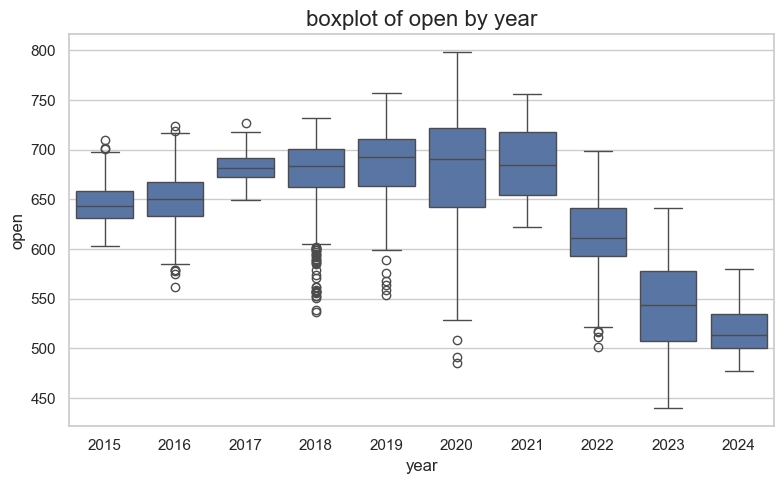

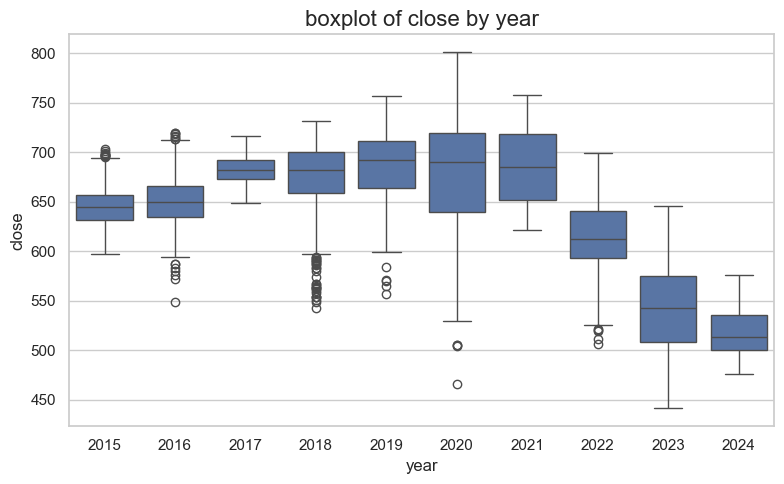

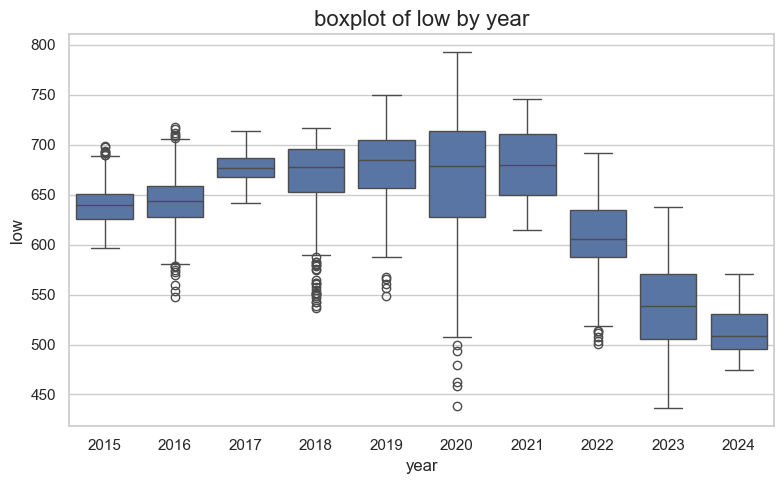

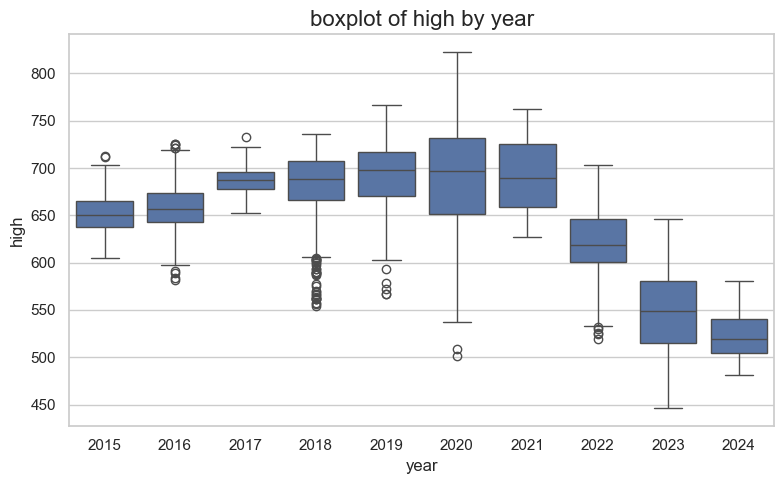

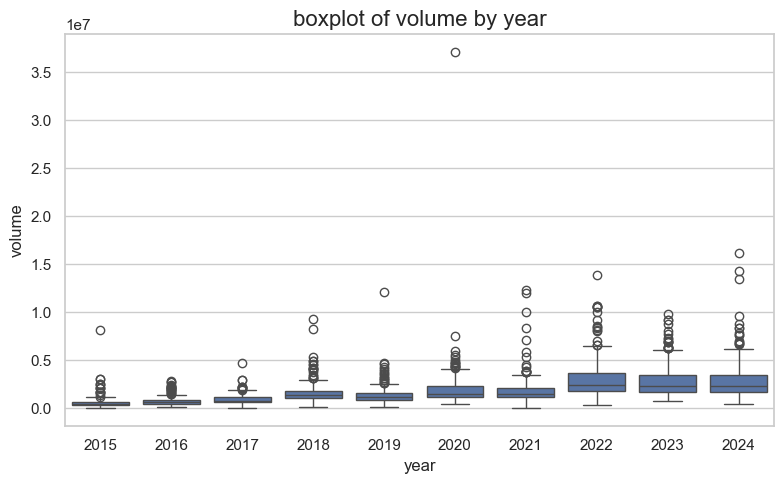

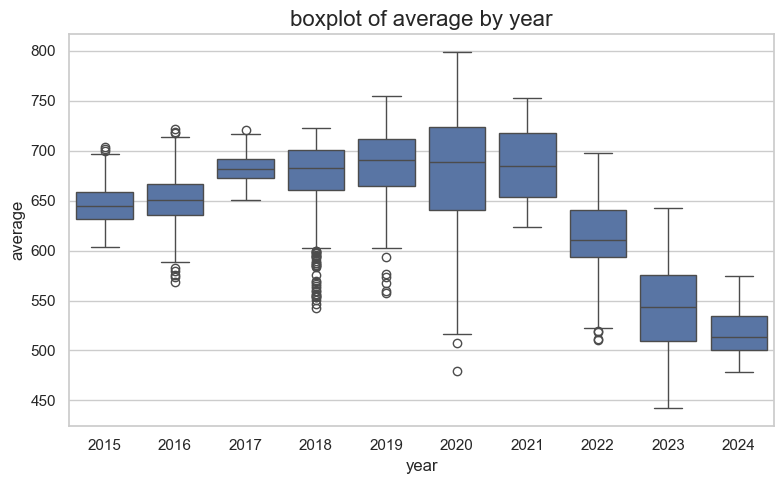

In [51]:
columns = ['open', 'close', 'low', 'high', 'volume', 'average']

for col in columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='year', y=col) 
    plt.title(f"boxplot of {col} by year", fontsize=16)
    plt.tight_layout()
    plt.show()

In analyzing the stock data, several outliers were observed across the different features. However, these outliers are not spread widely and tend to be closely clustered together. This indicates that while there are extreme values, they do not diverge significantly from the overall trend, suggesting that they might represent specific periods of unusual but not entirely anomalous market behavior. The closeness of these outliers may imply that they are part of short-term fluctuations within the stock's price movement, rather than true anomalies. This characteristic could be important for further analysis as it might help distinguish between regular market volatility and rare, exceptional events

---

## Stock Risk Assessment: Analyzing Highs, Lows, and Volume Trends

In [52]:
yearly_stats = df.groupby('year').agg({
    'high': 'max',
    'low': 'min',
    'volume': 'sum',
})

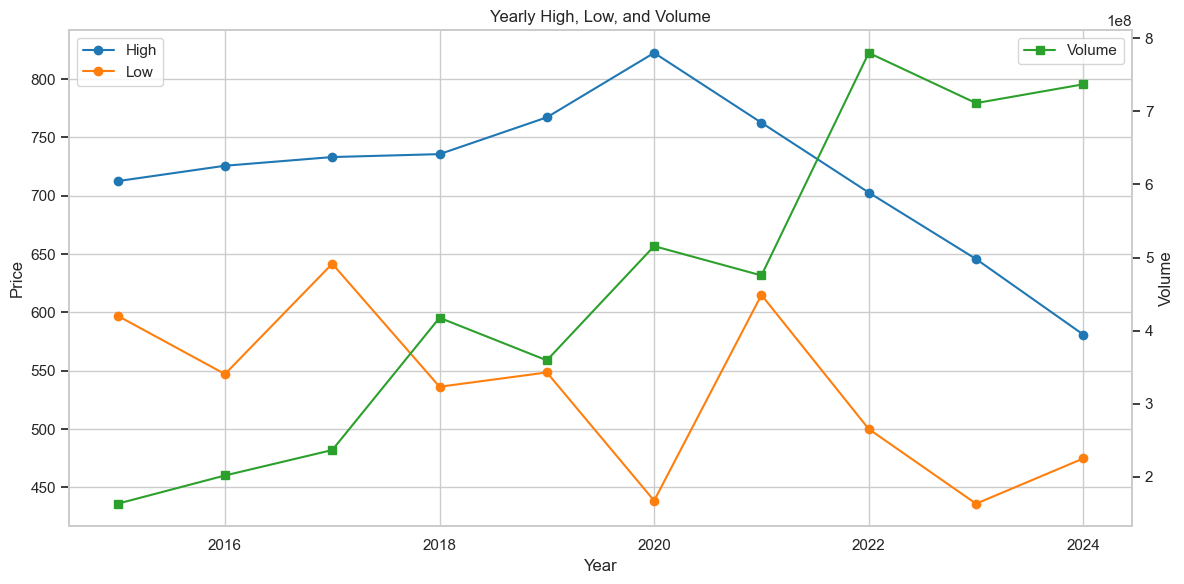

In [53]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(yearly_stats.index, yearly_stats['high'], marker='o', label='High', color='tab:blue')
ax1.plot(yearly_stats.index, yearly_stats['low'], marker='o', label='Low', color='tab:orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['volume'], marker='s', label='Volume', color='tab:green')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title("Yearly High, Low, and Volume")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

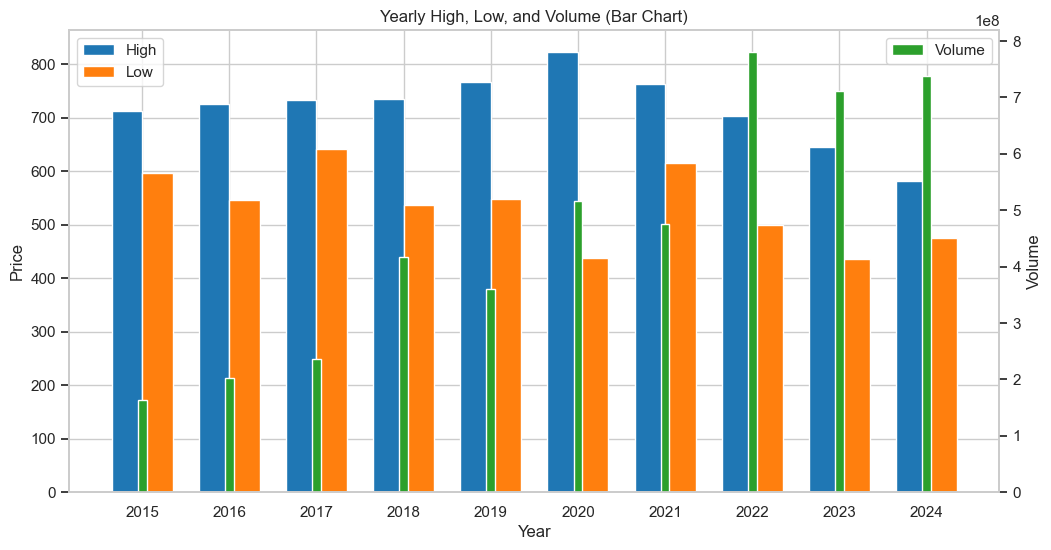

In [54]:
years = yearly_stats.index
bar_width = 0.35
x = range(len(years))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar([p - bar_width/2 for p in x], yearly_stats['high'], bar_width, label='High', color='tab:blue')
ax1.bar([p + bar_width/2 for p in x], yearly_stats['low'], bar_width, label='Low', color='tab:orange')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, yearly_stats['volume'], width=0.1, label='Volume', color='tab:green')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title('Yearly High, Low, and Volume (Bar Chart)')
plt.grid(axis='y')
plt.show()

These charts compare yearly high and low stock prices with total trading volume. While trading volume has steadily increased over the years, both high and low prices have shown a declining trend. This divergence may indicate growing market activity despite weakening price momentum, potentially reflecting increased selling pressure, market saturation, or a shift in investor sentiment

---

## Summary

* Exploratory Data Analysis (EDA): We performed an exploratory analysis, adding relevant features and targets for both regression and classification tasks in supervised learning

* Data Quality: The dataset was clean with no missing values. A small amount of missing data was introduced when shifting columns to create new features, but the volume was minimal and dropping them did not affect the analysis

* Feature Correlation: There is a high correlation between stock-related numerical features (open, close, low, high), which is typical for stock data. However, there is very little correlation between the targets, time/date features, and volume, indicating potential unpredictability in the stock trends

### Conclusion & Next Steps:

* Observed Trend: A downward trend was observed in high and low values over the years, while volume showed an increase

* Next Steps: The next step will be to re-add the features, clean the data further, and then split it into training and testing sets. This will prepare the data for the feature engineering stage